Loading all required libraries:

In [30]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from textwrap import wrap
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()


Let us first read in the original data files:

In [31]:
df_15 = pd.read_csv('2015.csv')
df_16 = pd.read_csv('2016.csv')
df_17 = pd.read_csv('2017.csv')

Changing the column names for all the data files so that they are consistent.

In [32]:
#Changing column names for easier processing

df_15.columns = ("Country", "Region", "Happiness_Rank_15", "Happiness_Score_15", "Standard_Error_15", "Economy_15", "Family_15", "Life_Expectancy_15", "Freedom_15", "Trust_15", "Generosity_15" , "Dystopia_15")

df_16.columns = ("Country", "Region", "Happiness_Rank_16", "Happiness_Score_16", "Whisker_Low_16", "Whisker_High_16", "Economy_16", "Family_16", "Life_Expectancy_16", "Freedom_16", "Trust_16", "Generosity_16", "Dystopia_16")

df_17.columns = ("Country", "Happiness_Rank_17", "Happiness_Score_17", "Whisker_High_17", "Whisker_Low_17", "Economy_17", "Family_17", "Life_Expectancy_17", "Freedom_17", "Generosity_17", "Trust_17", "Dystopia_17")

Let us now create a Data Frame with Happiness Scores for each year for later analysis:

In [33]:
df_HS_All = pd.DataFrame({'Happiness Score 2015': df_15['Happiness_Score_15'], 'Happiness Score 2016': df_16['Happiness_Score_16'], 'Happiness Score 2017': df_17['Happiness_Score_17']})

Below, we have created a data frame with merged data of all the years, and a data set that merges data for 2015 and 2017. These data frames will be used later in our analysis.

In [34]:
#Combining data for 2015 and 2017

df_1517 = pd.merge(df_15, df_17, on = ['Country'])

#Combining data for all three years

df_151617 = pd.merge(df_1517, df_16, on = ['Country'])

df_151617.to_csv("Country_Check.csv")

In [35]:
df_diff = pd.DataFrame()

In [36]:
df_diff['Country'] = df_1517['Country']

df_diff['Happiness_Rank_diff'] = df_1517['Happiness_Rank_17'] - df_1517['Happiness_Rank_15']

df_diff['Happiness_Score_diff'] = df_1517['Happiness_Score_17'] - df_1517['Happiness_Score_15']

df_diff['Economy_diff'] = df_1517['Economy_17'] - df_1517['Economy_15']

df_diff['Family_diff'] = df_1517['Family_17'] - df_1517['Family_15']

df_diff['Life_Expectancy_diff'] = df_1517['Life_Expectancy_17'] - df_1517['Life_Expectancy_15']

df_diff['Freedom_diff'] = df_1517['Freedom_17'] - df_1517['Freedom_15']

df_diff['Trust_diff'] = df_1517['Trust_17'] - df_1517['Trust_15']

df_diff['Generosity_diff'] = df_1517['Generosity_17'] - df_1517['Generosity_15']

In [37]:
#Sorting the df_diff file by the difference in happiness scores

df_diff_sort = df_diff.sort_values('Happiness_Score_diff')

Starting off with the analysis, let us have a look at the boxplots to compare the distribution of Happiness Scores for the three years

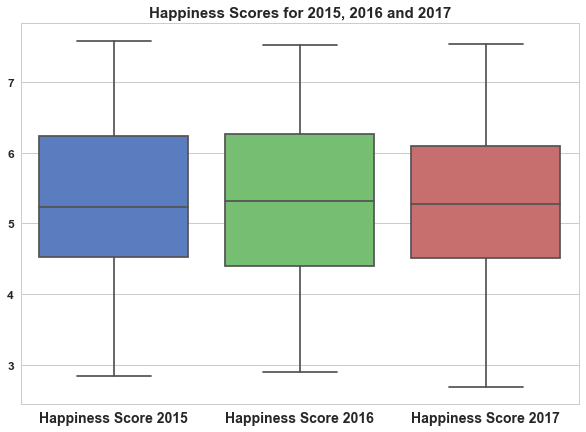

In [38]:
#Boxplot comparing distribution of Happiness Score for the three years

ax = plt.axes()
sns.boxplot(df_HS_All)
ax.set_title('Happiness Scores for 2015, 2016 and 2017', fontsize = 15 ,fontweight = 'bold')
ax.figure.set_size_inches(10, 7)
plt.xticks(size = 14)
plt.yticks(size = 12)
plt.show()

To further understand the data, let us plot boxplots for all the factors that contribute to Happiness Scores.

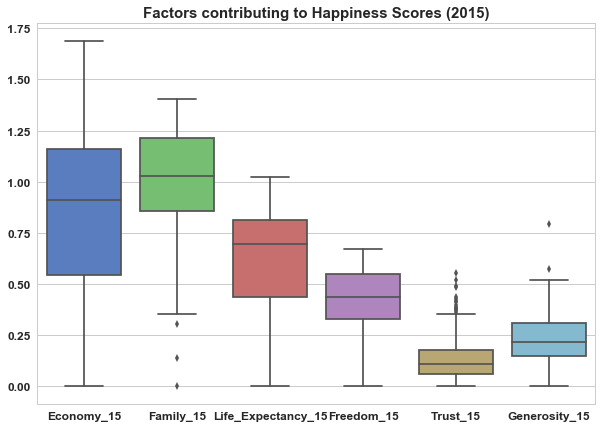

In [39]:
#Boxplot for 2015

ax = plt.axes()
sns.boxplot(df_15[['Economy_15', 'Family_15', 'Life_Expectancy_15', 'Freedom_15', 'Trust_15', 'Generosity_15']])
ax.set_title('Factors contributing to Happiness Scores (2015)', fontsize = 15 ,fontweight = 'bold')
ax.figure.set_size_inches(10, 7)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

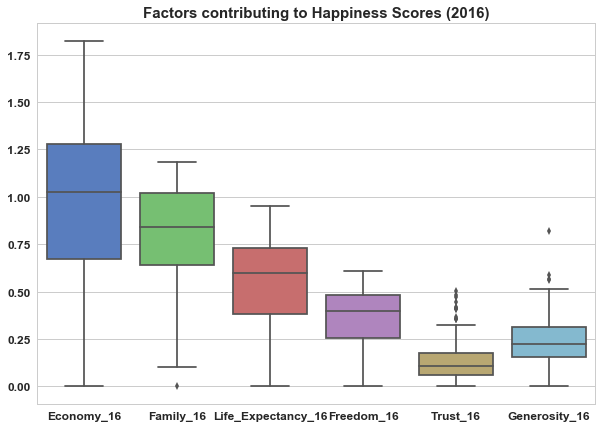

In [40]:
#Boxplot for 2016

ax = plt.axes()
sns.boxplot(df_16[['Economy_16', 'Family_16', 'Life_Expectancy_16', 'Freedom_16', 'Trust_16', 'Generosity_16']])
ax.set_title('Factors contributing to Happiness Scores (2016)', fontsize = 15,fontweight = 'bold')
ax.figure.set_size_inches(10, 7)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

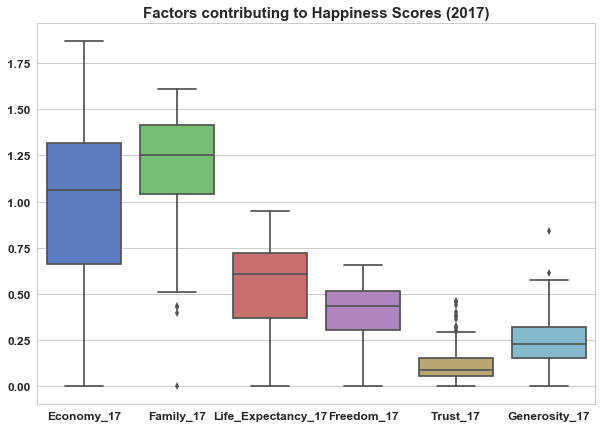

In [41]:
#Boxplot for 2017

ax = plt.axes()
sns.boxplot(df_17[['Economy_17', 'Family_17', 'Life_Expectancy_17', 'Freedom_17', 'Trust_17', 'Generosity_17']])
ax.set_title('Factors contributing to Happiness Scores (2017)', fontsize = 15,fontweight = 'bold')
ax.figure.set_size_inches(10, 7)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

To further explore our search for patterns in the data, let us plot World Maps showing happiness scores across the world. We have drawn separate world maps for happiness scores of 2015, 2016 and 2017. Also, we plotted maps for each of the contributing factors (Economy, Family, Health etc.) to get an idea of how they change across the years.  

The data that we used for the visualizations was untidy. We converted it to a tidy data set by removing all the 
redundant rows or columns that weren't appropriate. We also made sure that we renamed the columns to something more apt for our visualizations. The data is now organised and ordered. All three data files were compared and made tidy such that there are no repetitions or redunant data. 

In [42]:
#Loading data for 2015_tidy
df = pd.read_csv("2015_tidy.csv")

Let us plot all the maps for the year 2015

In [43]:
#World Map - Happiness Score for 2015

data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score (2015)', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

This visualization shows us how the happiness score varies across the countries for the year 2015.
The color bar on the right represents the approximation of the color to the happiness score.
The happiness score across regions like North America, Europe and Australia seem to be high. This can be due to factors like Economy, Family, Health etc. However Regions like Africa and Southern Asia have lesser score possibly due to the same factors. 


Now, we shall plot the same map for year 2016

In [44]:
#Loading data for 2016
df = pd.read_csv("2016_tidy.csv")

In [45]:
#World map showing the spread of happiness score across countries in 2016
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score(2016)', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

This visualization shows us how the happiness score varies across the countries for the year 2016.
The color bar on the right represents the approximation of the color to the happiness score.
The happiness score across regions like Eastern and Southern Asia seem to be intermediate. This is due to some of the factors present in the dataset. 

Now, we shall plot the same map for year 2017

In [46]:
#Loading data for 2017
df = pd.read_csv("2017_tidy.csv")

In [47]:
#World map showing the spread of happiness score across countries in 2016
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness.Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score (2017)', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

The maps for all three years look similar but there are certain regions like Africa, Southern Asia and Europe where you can see slight changes in color. There have been certain countries that have gone up the table for happiness rank. This again is dependent on the factors present in the dataset. 

Now that we have explored the happiness scores across the world and each of the explanatory factor's contribution, let us delve further to understand which countries became happier from 2015 to 2017, and which ones had a decrease in the happiness scores

In [48]:
df_decrease = df_diff_sort.loc[df_diff_sort['Happiness_Score_diff'] < 0]
df_increase = df_diff_sort.loc[df_diff_sort['Happiness_Score_diff'] > 0]

Having divided the countries by whether their happiness scored increased or decreased from 2015 to 2017, let us further divide them into subgroups by the amount of decrease or increase they saw in these years.

In [49]:
df_decrease_1 = df_diff_sort.loc[(df_diff_sort['Happiness_Score_diff'] <= 0) & (df_diff_sort['Happiness_Score_diff'] > -0.2)]
df_decrease_2 = df_diff_sort.loc[df_diff_sort['Happiness_Score_diff'] < -0.20]

df_increase_1 = df_diff_sort.loc[(df_diff_sort['Happiness_Score_diff'] > 0) & (df_diff_sort['Happiness_Score_diff'] < 0.2)]
df_increase_2 = df_diff_sort.loc[(df_diff_sort['Happiness_Score_diff'] >= 0.2) & (df_diff_sort['Happiness_Score_diff'] < 0.4)]
df_increase_3 = df_diff_sort.loc[df_diff_sort['Happiness_Score_diff'] >= 0.4]

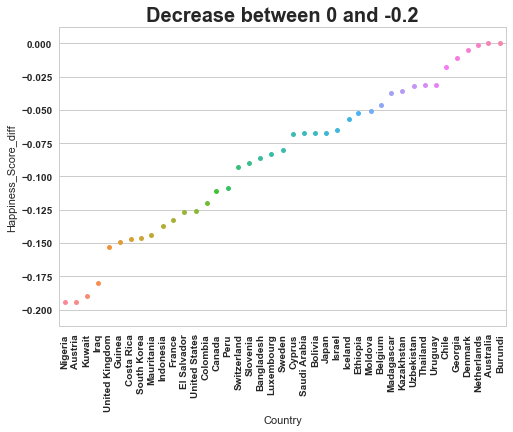

In [50]:
#Scatter plot of countries with decrease in happiness score between 0 and -0.2

g = sns.stripplot(x="Country", y="Happiness_Score_diff", data=df_decrease_1, jitter=True)
plt.xticks(rotation=90)
plt.title('Decrease between 0 and -0.2',fontsize=20,fontweight = 'bold')
plt.show()

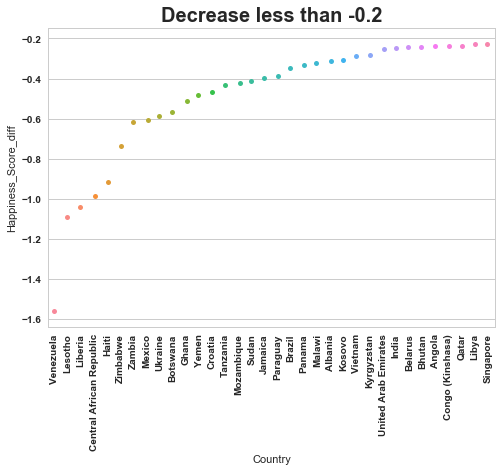

In [51]:
#Scatter plot of countries with decrease in happiness score between 0 and -0.2

g = sns.stripplot(x="Country", y="Happiness_Score_diff", data=df_decrease_2, jitter=True)
plt.xticks(rotation=90)
plt.title('Decrease less than -0.2',fontsize=20,fontweight = 'bold')
plt.show()

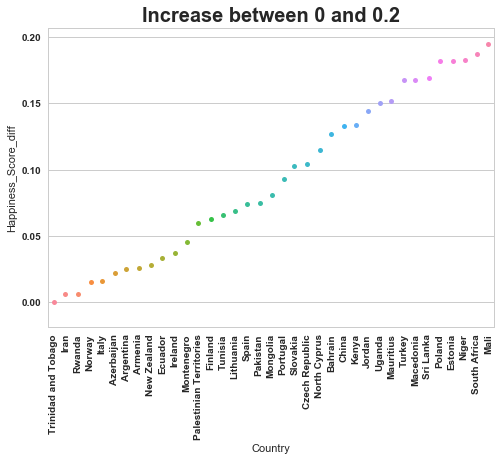

In [52]:
#Scatter plot of countries with increase in happiness score between 0 and 0.2

q = sns.stripplot(x="Country", y="Happiness_Score_diff", data=df_increase_1, jitter=True)
plt.xticks(rotation=90)
plt.title('Increase between 0 and 0.2',fontsize =20,fontweight='bold')
plt.show()

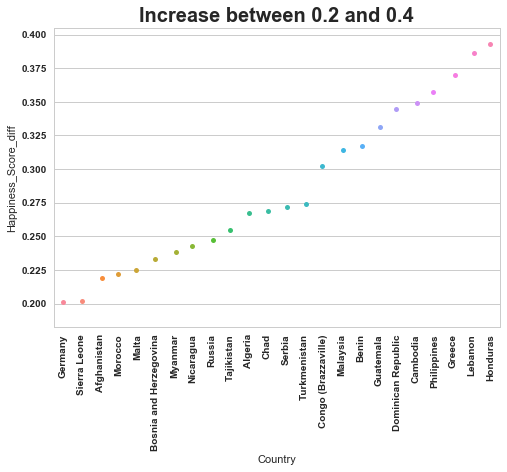

In [53]:
#Scatter plot of countries with increase in happiness score between 0.2 and 0.4

q = sns.stripplot(x="Country", y="Happiness_Score_diff", data=df_increase_2, jitter=True)
plt.xticks(rotation=90)
plt.title('Increase between 0.2 and 0.4',fontsize=20,fontweight = 'bold')
plt.show()

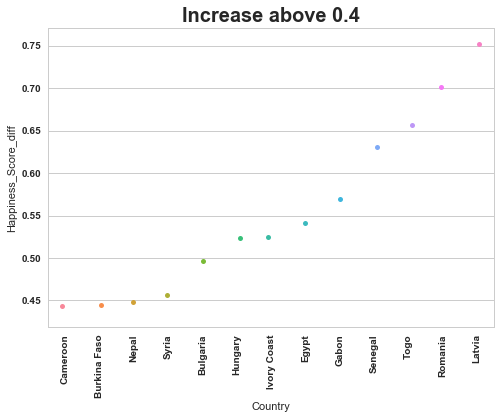

In [54]:
#Scatter plot of countries with increase in happiness score greater than 0.4

q = sns.stripplot(x="Country", y="Happiness_Score_diff", data=df_increase_3, jitter=True)
plt.xticks(rotation=90)
plt.title('Increase above 0.4',fontsize=20,fontweight = 'bold')
plt.show()

To further narrow our analysis, let us pick out the top 10 countries with the highest decrease in happiness scores from 2015 to 2017. Then, let us try to analyse what factors were most conducive to the drastic decrease. Similarly, let us check it for the top 10 countries with the highest increase in happiness scores also.

In [55]:
#Getting the Top N countries with the highest decrease in happiness scores from 2015 to 2017

N = 10

Top10_Decrease = df_diff_sort[0:10]
Top10_Increase = df_diff_sort[df_diff_sort.shape[0]-10:]

In [56]:
#Indexing the Top10_Decrease and Top10_Increase datasets by country, so as to plot in a heatmap later

Top10_Decrease.index = Top10_Decrease['Country']

del Top10_Decrease['Country']

Top10_Increase.index = Top10_Increase['Country']

del Top10_Increase['Country']

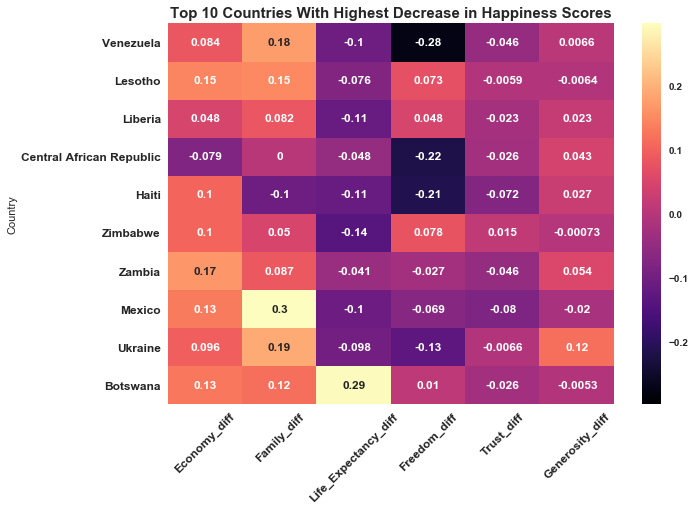

In [57]:
#Plotting Top 10 countries with highest decrease in happiness against the difference in explanatory factors for happiness scores

ax = plt.axes()
sns.heatmap(Top10_Decrease[Top10_Decrease.columns[2:]], annot = True, cmap = 'magma', ax = ax)
ax.set_title("\n".join(wrap('Top 10 Countries With Highest Decrease in Happiness Scores')), fontsize = 15 ,fontweight = 'bold')
ax.figure.set_size_inches(10, 7)
plt.xticks(size = 12, rotation = 45)
plt.yticks(size = 12)
plt.show()

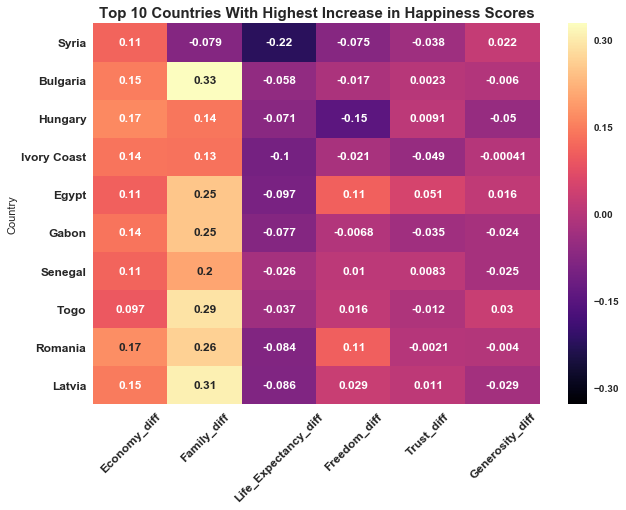

In [58]:
#Plotting Top 10 countries with highest increase in happiness against the difference in explanatory factors for happiness scores

ax = plt.axes()
sns.heatmap(Top10_Increase[Top10_Increase.columns[2:]], annot = True, cmap = 'magma', ax = ax)
ax.set_title("\n".join(wrap('Top 10 Countries With Highest Increase in Happiness Scores'))
             , fontsize = 15, fontweight = 'bold')
ax.figure.set_size_inches(10, 7)
plt.xticks(size = 12, rotation = 45)
plt.yticks(size = 12)
plt.show()

Another interesting paridigm to group our data would be by the region they belong to. It would be interesting to see if there are any patterns within regions.

In [59]:
#Reading the tidy datasets

df_15_tidy = pd.read_csv("2015_tidy.csv")
df_16_tidy = pd.read_csv("2016_tidy.csv")
df_17_tidy = pd.read_csv("2017_tidy.csv")

In [60]:
df_17_tidy.columns = df_16_tidy.columns

pd.DataFrame.to_csv(pd.concat([df_15_tidy, df_16_tidy, df_17_tidy]), "Happiness_Combined.csv")

Let us average all the explanatory factors by the region:

In [61]:
#Computing average of all factors by region

df_15_avg = df_15_tidy.groupby(['Region']).mean()
df_16_avg = df_16_tidy.groupby(['Region']).mean()
df_17_avg = df_17_tidy.groupby(['Region']).mean()

In [62]:
#Adding a column for all averaged data sets to represent year

df_15_avg['Year'] = '2015'
df_16_avg['Year'] = '2016'
df_17_avg['Year'] = '2017'

In [63]:
#Changing column names for df_17_avg

df_17_avg.columns = df_16_avg.columns

Combining all the averaged data into one data set

In [64]:
#Combining all averaged data sets

df_avg = pd.concat([df_15_avg, df_16_avg, df_17_avg])

Let us now construct different plots, regionwise:

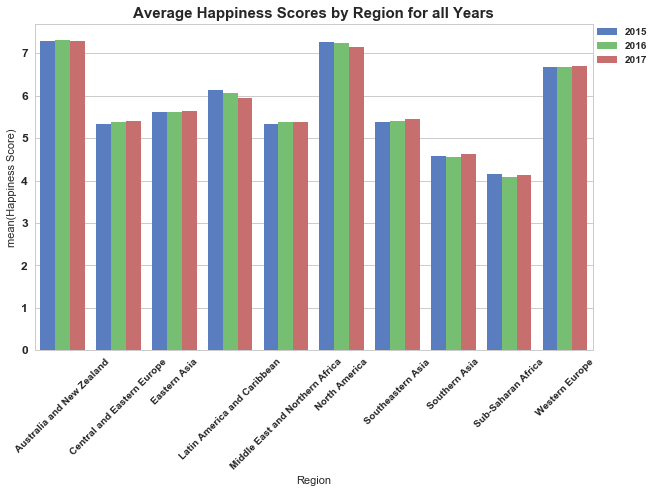

In [65]:
#Average happiness scores by region for all years

ax = plt.axes()
sns.barplot(x=df_avg.index, y="Happiness Score", hue = 'Year', data=df_avg)
ax.set_title('Average Happiness Scores by Region for all Years', fontsize = 15, fontweight = 'bold')
ax.figure.set_size_inches(10, 6)
plt.xticks(rotation = 45)
plt.yticks(size = 12)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

The barchart above represents categorical data(regions in this case) and the average value of the factors affecting the happiness score across three years. You can clearly see the increase or decrease across the years. The Sub-Saharan African Region has the lowest average Happiness Score followed by Southern Asia. 
 

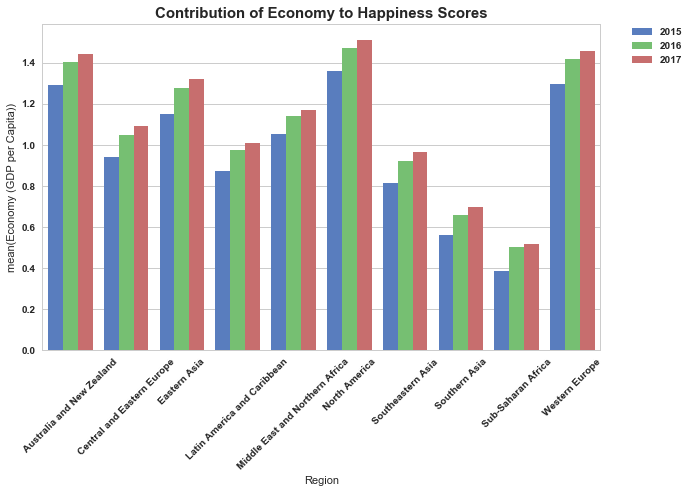

In [66]:
#Average contribution of Economy to Happiness Scores by region for all years

ax = plt.axes()
sns.barplot(x=df_avg.index, y='Economy (GDP per Capita)', hue = 'Year', data=df_avg)
ax.set_title("\n".join(wrap('Contribution of Economy to Happiness Scores')),
             fontsize = 15, fontweight = 'bold')
ax.figure.set_size_inches(10, 6)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the above barchart for average economy , we can clearly see that it has increased in all regions from 2015 to 2017. This can possibly be one of the factors that influenced certain countries to climb the happiness rank table.

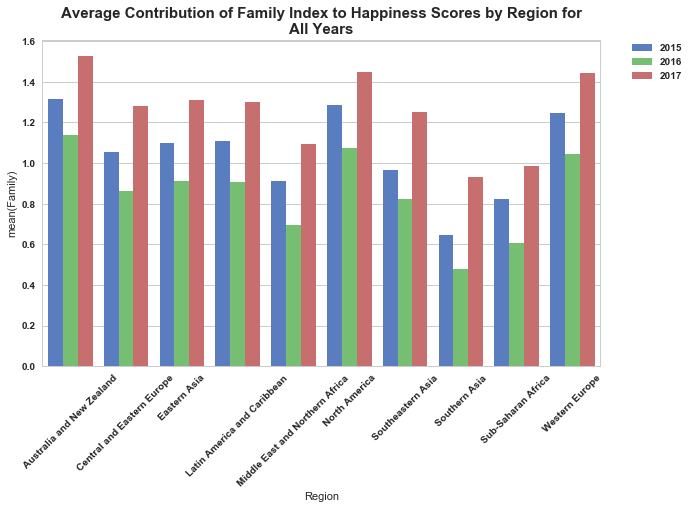

In [67]:
#Average contribution of Family index to Happiness Scores by region for all years

ax = plt.axes()
sns.barplot(x=df_avg.index, y='Family', hue = 'Year', data=df_avg)
ax.set_title("\n".join(wrap('Average Contribution of Family Index to Happiness Scores by Region for All Years')),
             fontsize = 15, fontweight = 'bold')
ax.figure.set_size_inches(10, 6)
plt.xticks(rotation = 45)
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the barchart above, the average values dropped from 2015 to 2016 but then increased again from 2016 to 2017. This can be seen for all the regions. 

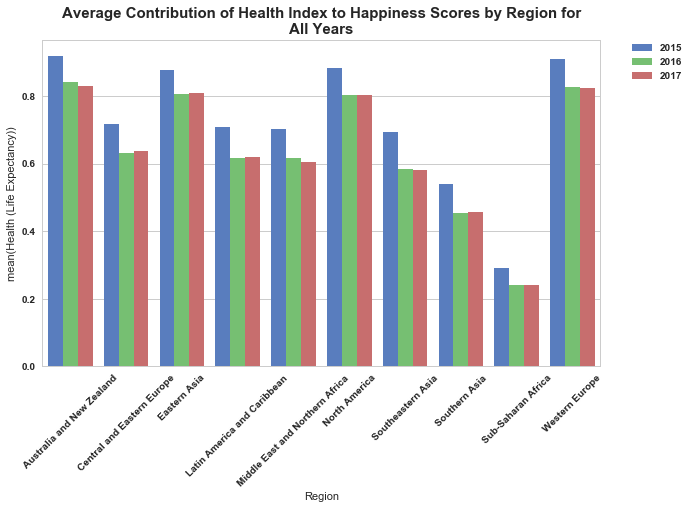

In [68]:
#Average contribution of Health (Life Expectancy) index to Happiness Scores by region for all years

ax = plt.axes()
sns.barplot(x=df_avg.index, y= 'Health (Life Expectancy)', hue = 'Year', data=df_avg)
ax.set_title("\n".join(wrap('Average Contribution of Health Index to Happiness Scores by Region for All Years')), 
             fontsize = 15, fontweight = 'bold')
ax.figure.set_size_inches(10, 6)
plt.xticks(rotation = 45)
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The average Health has clearly decreased from 2015 to 2017 for all regions. Especially for Sub-Saharan Africa. This might be one of the factors contributing to sadness rather than happiness.

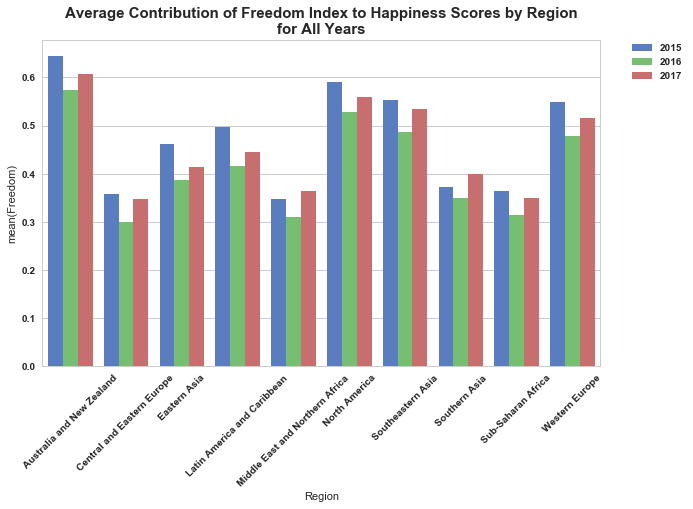

In [69]:
#Average contribution of Freedom index to Happiness Scores by region for all years

ax = plt.axes()
sns.barplot(x=df_avg.index, y= 'Freedom', hue = 'Year', data=df_avg)
ax.set_title("\n".join(wrap('Average Contribution of Freedom Index to Happiness Scores by Region for All Years')),
             fontsize = 15, fontweight = 'bold')
ax.figure.set_size_inches(10, 6)
plt.xticks(rotation = 45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The average freedom seems to have dropped fromm 2015 to 2016 and then increased again from 2016 to 2017. There might be several reasons for this. This pattern is seen across all regions. 

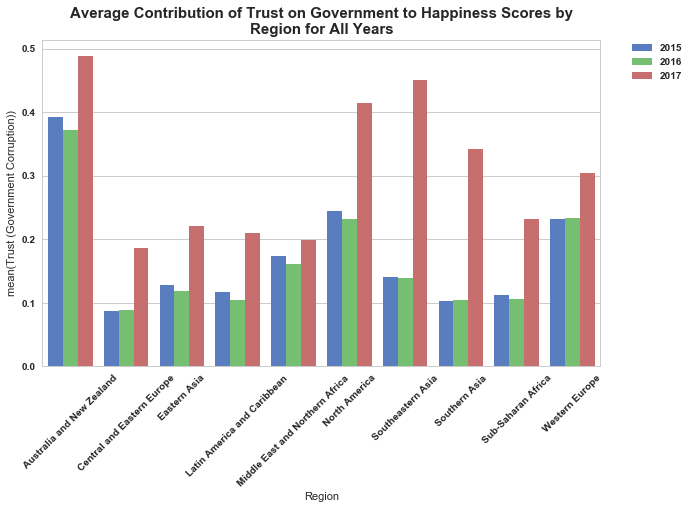

In [70]:
#Average contribution of Trust(Government Corruption) index to Happiness Scores by region for all years

ax = plt.axes()
sns.barplot(x=df_avg.index, y= 'Trust (Government Corruption)', hue = 'Year', data=df_avg)
ax.set_title("\n".join(wrap('Average Contribution of Trust on Government to Happiness Scores by Region for All Years')),
             fontsize = 15, fontweight = 'bold')
ax.figure.set_size_inches(10, 6)
plt.xticks(rotation = 45)
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the above barchart , Average trust on government has increased by a huge amount in 2017. This might be due to change in policies or even rule. A change in one or two regions might have affected the change in the entire world. It is a positive change.

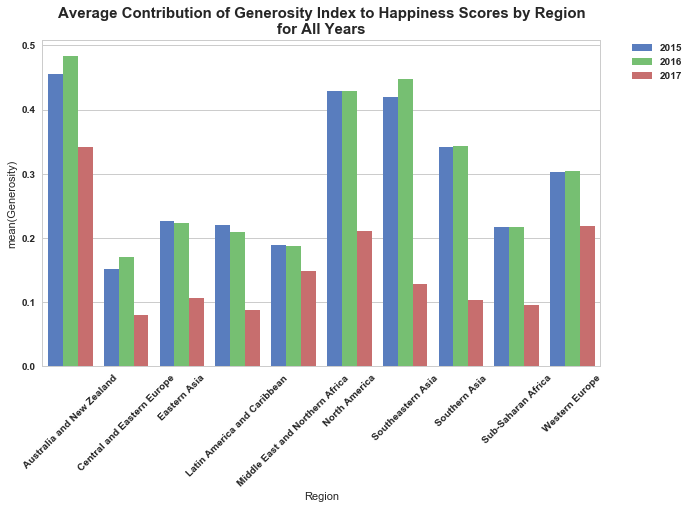

In [71]:
#Average contribution of Generosity index to Happiness Scores by region for all years

ax = plt.axes()
sns.barplot(x=df_avg.index, y= 'Generosity', hue = 'Year', data=df_avg)
ax.set_title("\n".join(wrap('Average Contribution of Generosity Index to Happiness Scores by Region for All Years')),
             fontsize = 15, fontweight = 'bold')
ax.figure.set_size_inches(10, 6)
plt.xticks(rotation = 45)
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The average Generosity seems to have reduced quite a bit especially in 2017. This might be due to fact that countries realized that being generous might not help in increasing the happiness score as much as the other factors or this can just be due to socio-economic factors in each region.

We also wanted to plot a bar graph to display how the factors affect Happiness Score in each of the countries.
This graph was made using dataset 2015_tidy, 2016_tidy and 2017_tidy.

These bargraphs are drawn for the top 8 countires that had the highest increase in happiness score from 2015 to 2017.
They also represent how each factor affects happiness score across all three years for a particular country. 
 The first country on the list is Egypt.

In [72]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Egypt']
data_2016 = data_2016.loc[data_2016['Country'] == 'Egypt']
data_2015 = data_2015.loc[data_2015['Country'] == 'Egypt']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

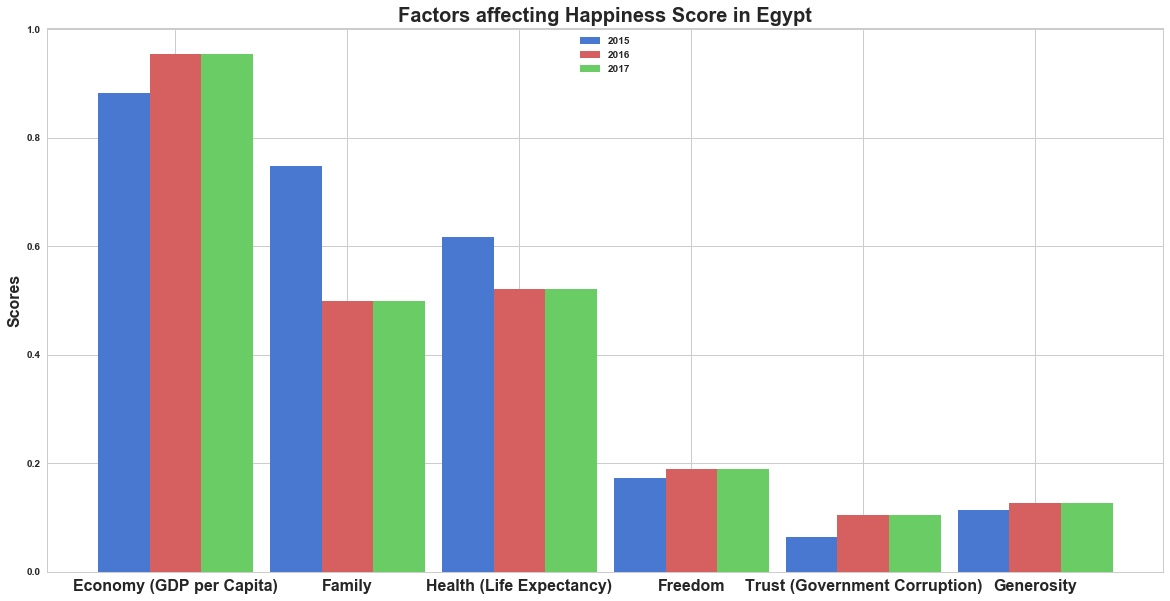

In [73]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Egypt',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

In the above bargraph, economy seems to have been the greatest contributor to happiness score for Egypt. This is followed by Family and Health.

The second country on the list is Gabon. 

In [74]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Gabon']
data_2016 = data_2016.loc[data_2016['Country'] == 'Gabon']
data_2015 = data_2015.loc[data_2015['Country'] == 'Gabon']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

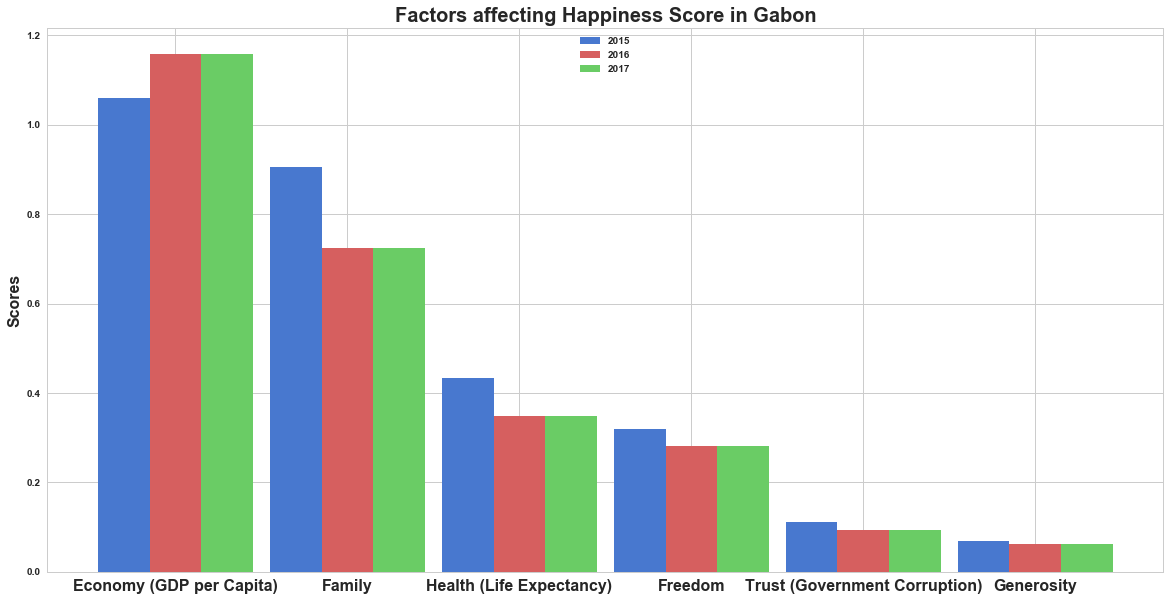

In [75]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Gabon',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

The factors that make Gabon second on the list would be Economy and Family again but Health seems to have reduced quite a bit compared to the previous chart.

The third country on the list is Hungary

In [76]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Hungary']
data_2016 = data_2016.loc[data_2016['Country'] == 'Hungary']
data_2015 = data_2015.loc[data_2015['Country'] == 'Hungary']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

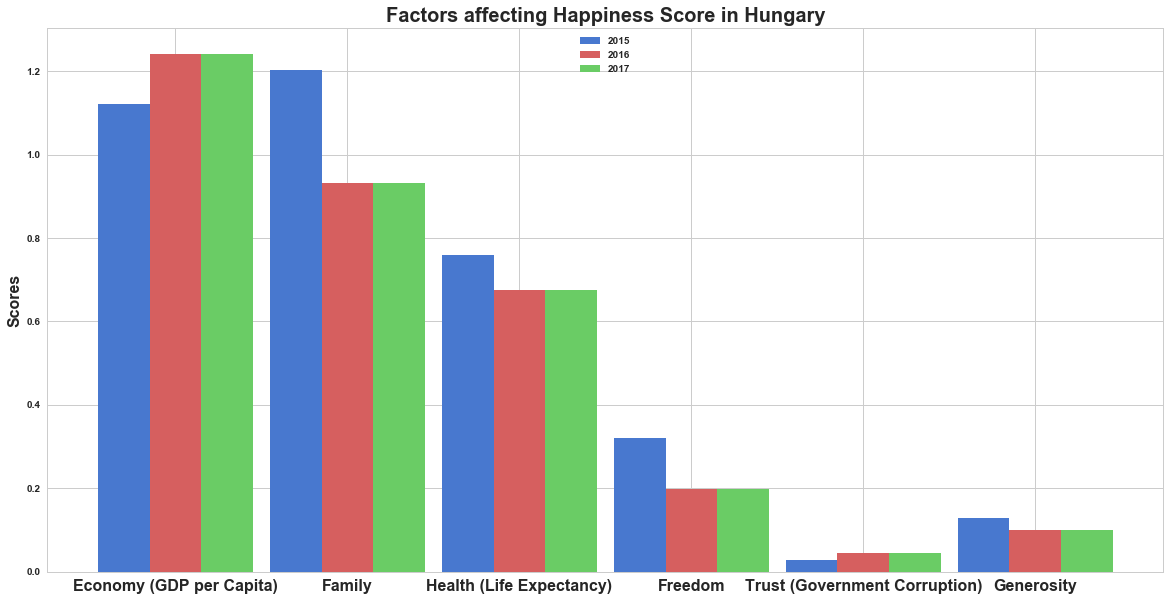

In [77]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Hungary',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

The next on the list is Ivory Coast

In [78]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Ivory Coast']
data_2016 = data_2016.loc[data_2016['Country'] == 'Ivory Coast']
data_2015 = data_2015.loc[data_2015['Country'] == 'Ivory Coast']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

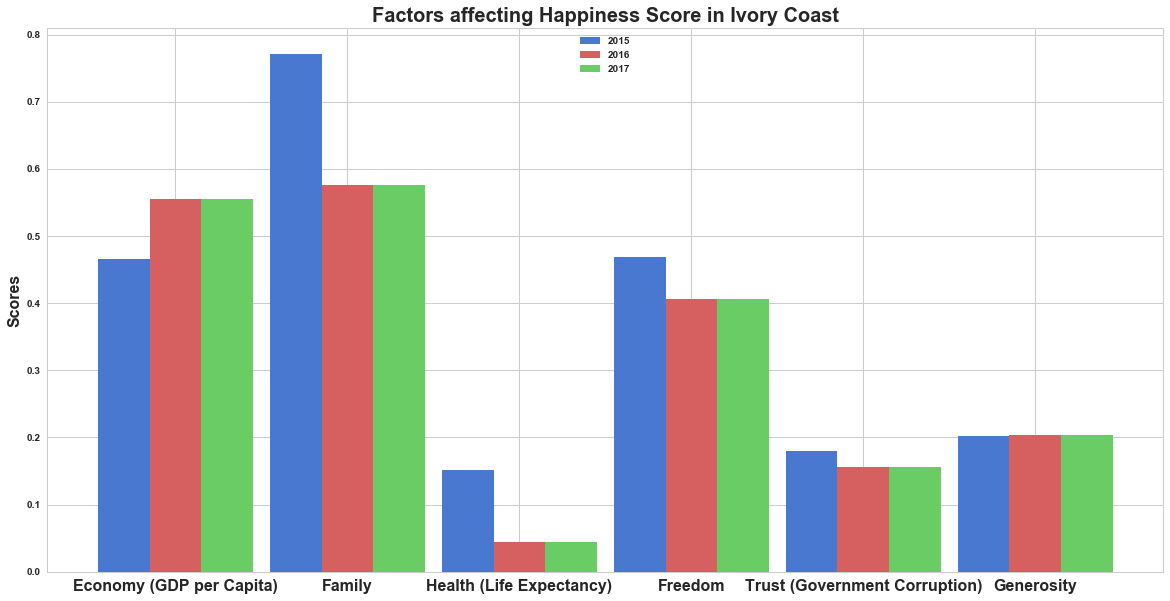

In [79]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Ivory Coast',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

The Ivory Coast has better freedom compared the countries above as per the graph. However the health and Economy have reduce quite a bit. Family has been an import factor influencing happiness for the Ivory Coast.

The fifth country on the list is Latvia

In [80]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Latvia']
data_2016 = data_2016.loc[data_2016['Country'] == 'Latvia']
data_2015 = data_2015.loc[data_2015['Country'] == 'Latvia']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

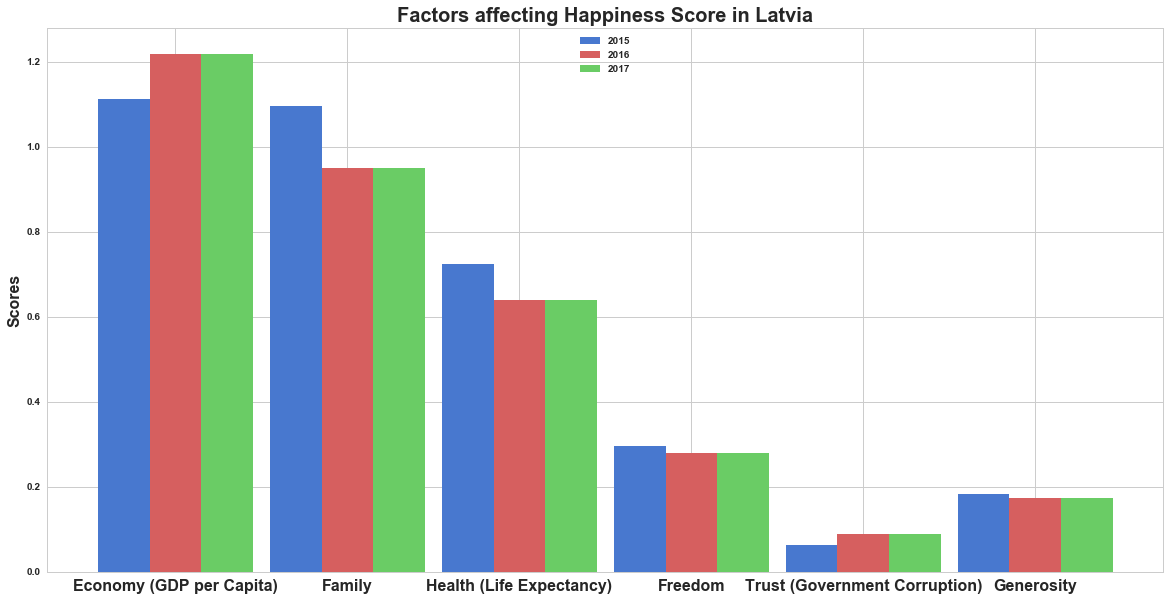

In [81]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Latvia',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

Each one of these bargraphs help us compare how the different factors affect happiness for the top 8 countries. It also helps with figuring out which factor might have been the more influencial one.

The next country is Romania

In [82]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Romania']
data_2016 = data_2016.loc[data_2016['Country'] == 'Romania']
data_2015 = data_2015.loc[data_2015['Country'] == 'Romania']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

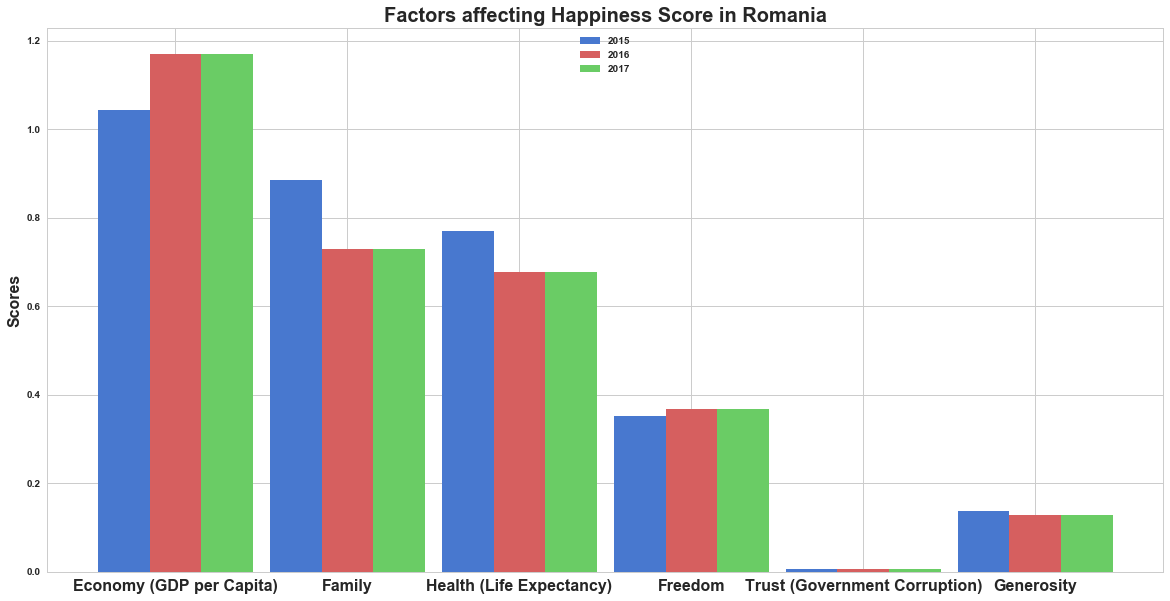

In [83]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Romania',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

The trust on government seems to be very low for Romania. This might be a factor that leads to sadness rather than happiness

The next country is Senegal

In [84]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Senegal']
data_2016 = data_2016.loc[data_2016['Country'] == 'Senegal']
data_2015 = data_2015.loc[data_2015['Country'] == 'Senegal']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

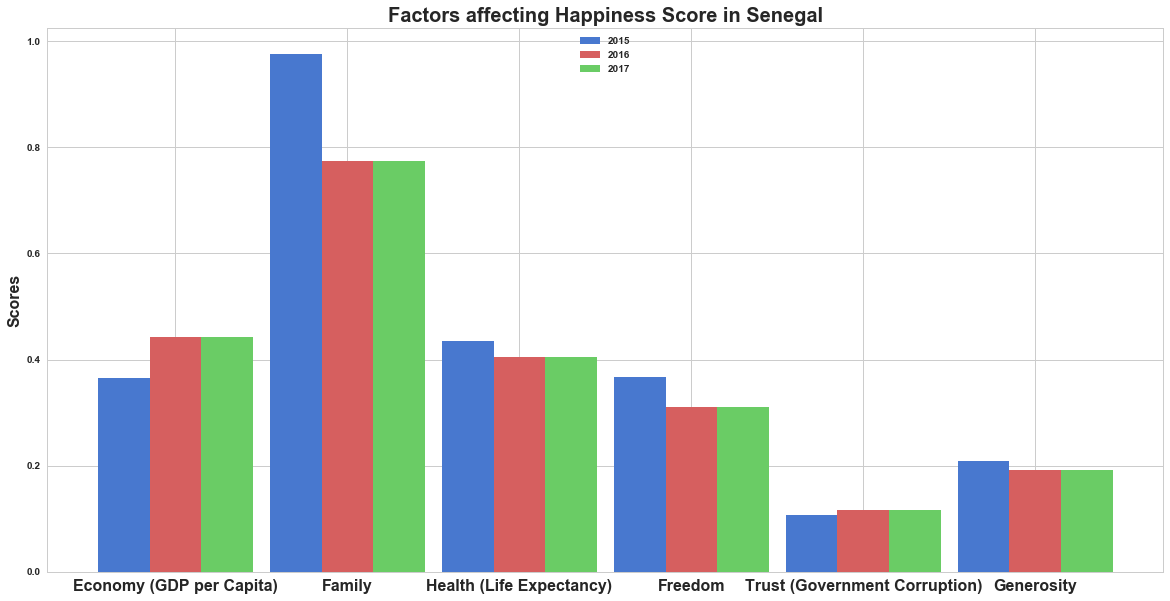

In [85]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Senegal',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

Family seems to be the major contributor for happiness but has reduced from 2015 to 2017. The economy and other factors seem to be lower than the countries above.

The last country is Togo

In [86]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Togo']
data_2016 = data_2016.loc[data_2016['Country'] == 'Togo']
data_2015 = data_2015.loc[data_2015['Country'] == 'Togo']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

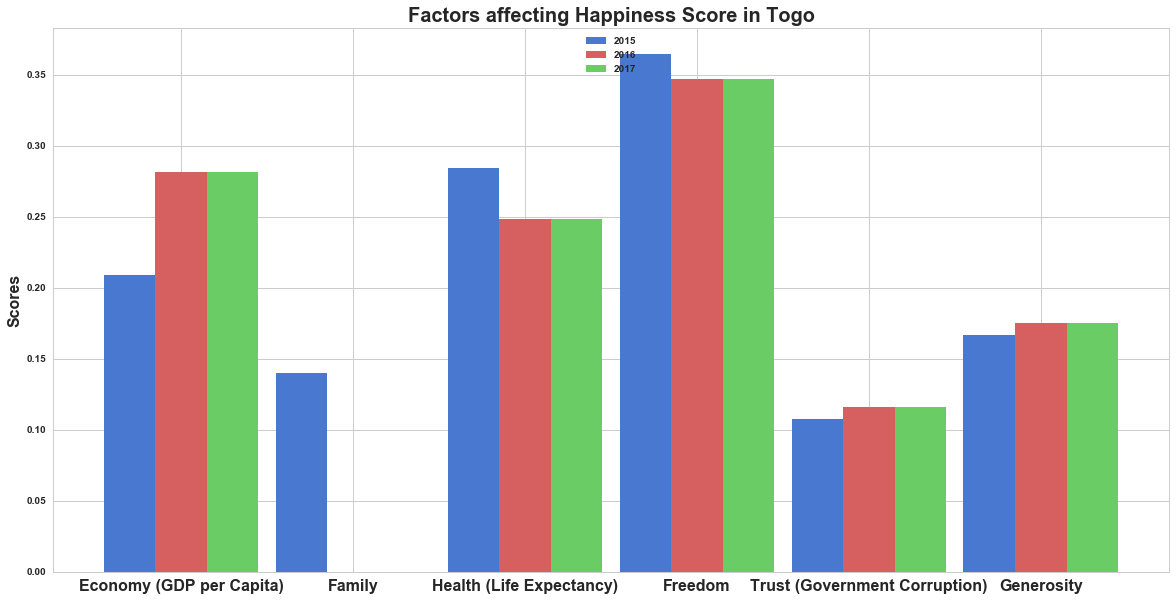

In [87]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Togo',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

Family has dropped completely from 2015 to 2017. However health and Freedom seem to be very high which might be the best influencers for happiness of Togo

Next, we draw bar charts for  4 countries with decrese in happiness score from 2015 to 2017.

The first country on the list to have a decreased value is Haiti

In [88]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Haiti']
data_2016 = data_2016.loc[data_2016['Country'] == 'Haiti']
data_2015 = data_2015.loc[data_2015['Country'] == 'Haiti']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

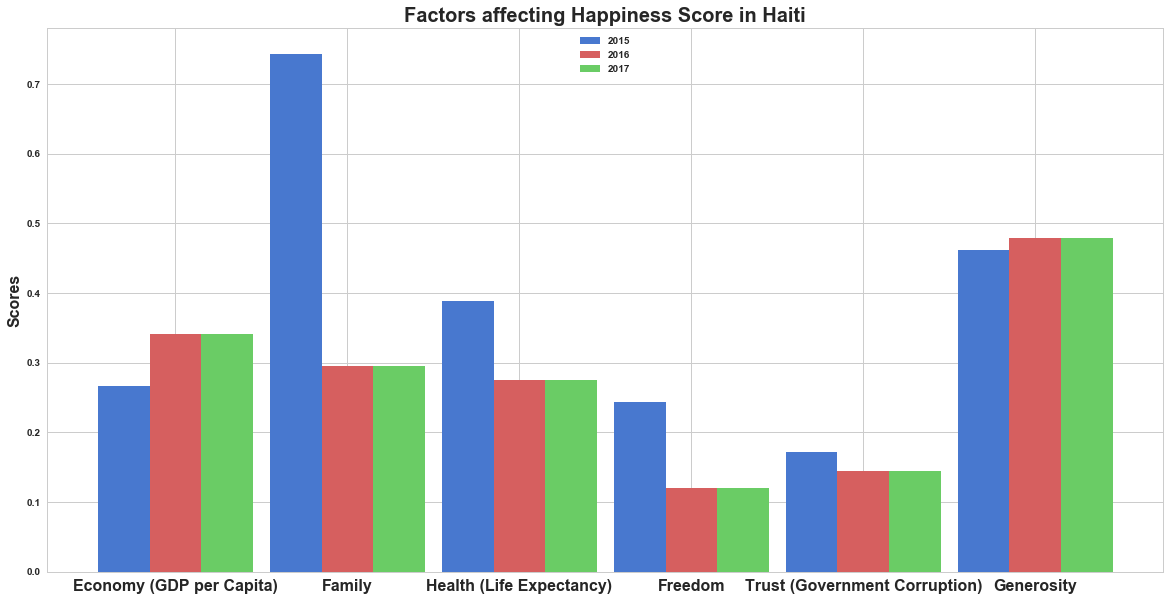

In [89]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Haiti',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

Although economy has increased from 2015 to 2017, family, health, freedom and trust have reduced from 2015 to 2017. Generosity seems to be quite high for Haiti and is the only factor that has increased throughtout the years.

The next country is Liberia

In [90]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Liberia']
data_2016 = data_2016.loc[data_2016['Country'] == 'Liberia']
data_2015 = data_2015.loc[data_2015['Country'] == 'Liberia']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

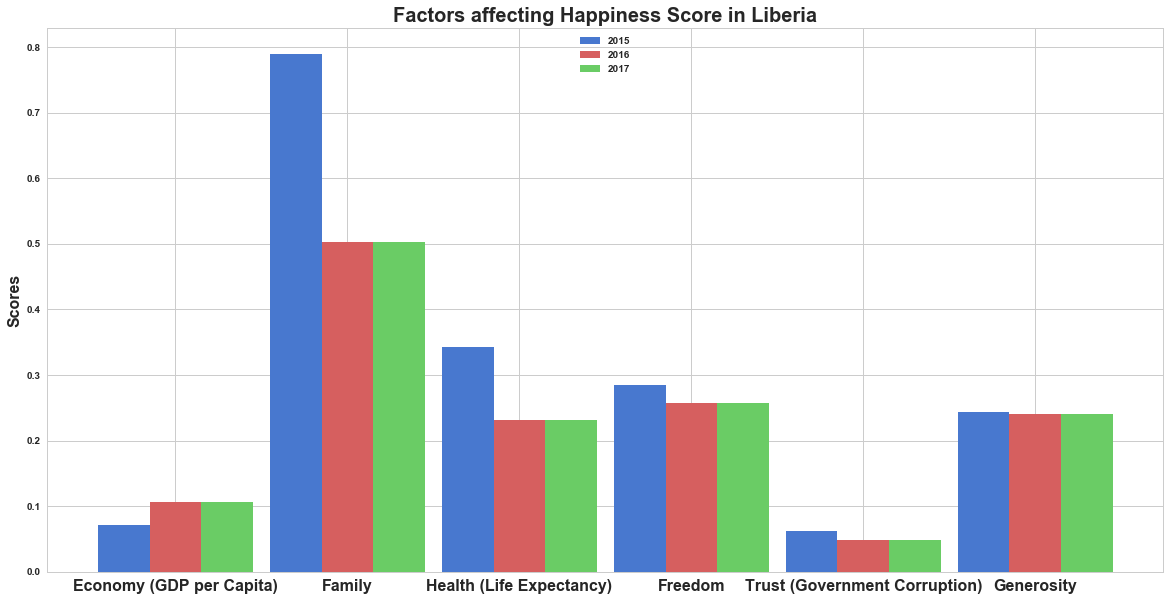

In [91]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Liberia',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

The economy in Liberia seems to be a factor that causes sadness rather than happiness. All the other factors have reduced or remained the same throughout the years which might be why it has gone down in the table of happiness ranks.

The next country is Venezuela

In [92]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Venezuela']
data_2016 = data_2016.loc[data_2016['Country'] == 'Venezuela']
data_2015 = data_2015.loc[data_2015['Country'] == 'Venezuela']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

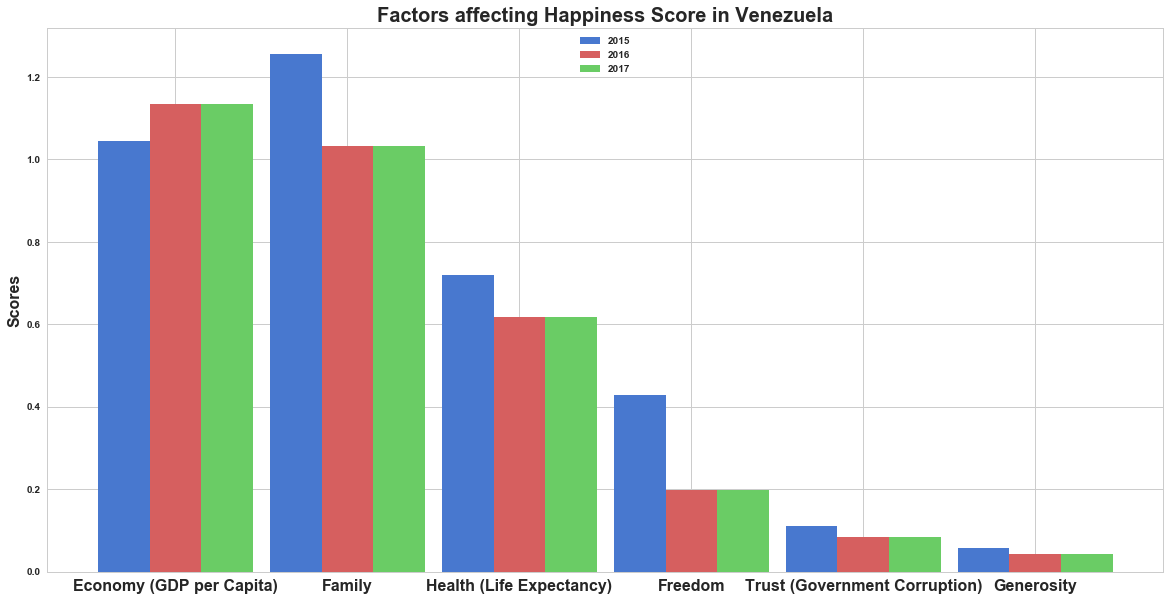

In [93]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Venezuela',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

The last country is Zimbabwe

In [94]:
data_2017 = pd.read_csv('2017_tidy.csv')
data_2016 = pd.read_csv('2016_tidy.csv')
data_2015 = pd.read_csv('2015_tidy.csv')
data_2017 = data_2017.loc[data_2015['Country'] == 'Zimbabwe']
data_2016 = data_2016.loc[data_2016['Country'] == 'Zimbabwe']
data_2015 = data_2015.loc[data_2015['Country'] == 'Zimbabwe']
data_2017 = data_2016.iloc[:, 4:10]
data_2016 = data_2016.iloc[:, 4:10]
data_2015 = data_2015.iloc[:, 4:10]

columns = tuple(data_2016.dtypes.index)
columns1 = tuple(data_2017.dtypes.index)

data_2015 = data_2015.iloc[:, :].values
data_2016 = data_2016.iloc[:, :].values
data_2017 = data_2017.iloc[:, :].values

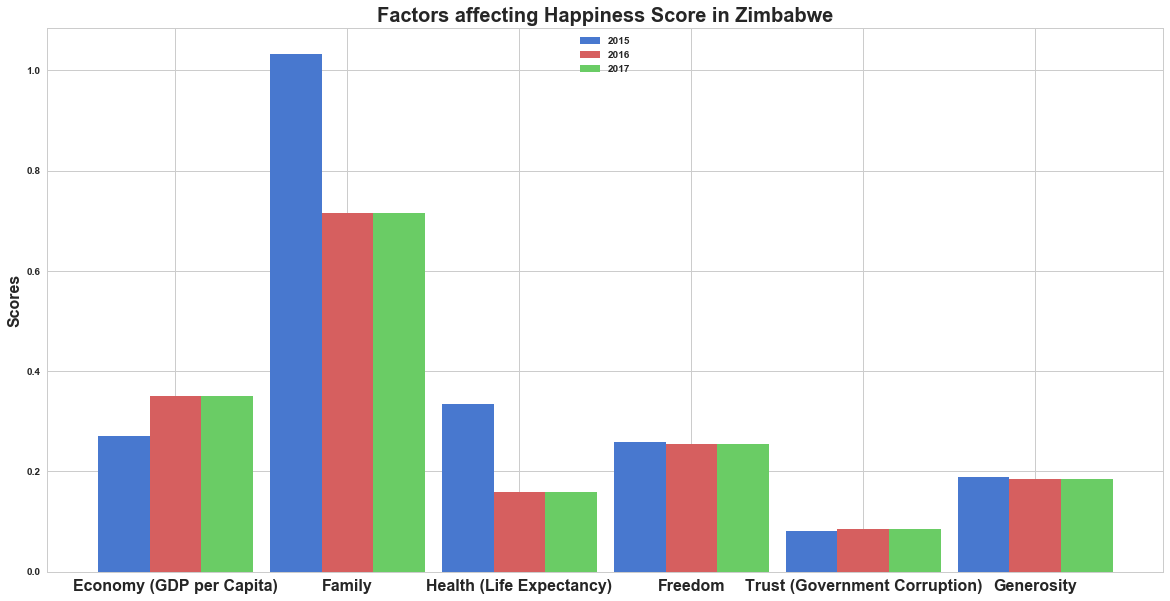

In [95]:
N = data_2015[0, :].shape[0]
N1 = data_2016[0, :].shape[0]
N3 = data_2017[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rc('font', weight='bold')
plt.rc('font', weight='bold')

ind = np.arange(N)
ind1=np.arange(N1)
ind2=np.arange(N3)
width = 0.3
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[0])
bar2 = ax.bar(ind1 + width, data_2016[0, :].tolist(), width, color = current_palette[2])
bar3 = ax.bar(ind1 + width*2, data_2017[0, :].tolist(), width, color = current_palette[1])

ax.set_ylabel('Scores',fontsize=16,fontweight='bold')
ax.set_title('Factors affecting Happiness Score in Zimbabwe',fontsize=20,fontweight='bold')
ax.set_xticks(ind + width*2 / 2)
ax.set_xticklabels(columns,fontsize=16)

ax.legend((bar1[0], bar2[0],bar3[0]), ('2015', '2016','2017'), loc='upper center')

plt.show()

Although Family factor has decreased from 2025 to 2017, it seems to be the one influencing happiness for zimbabwe. Most of the other factors have more or less remained the same throughout.